In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score
%matplotlib inline   

In [2]:
diab = pd.read_csv('data/diabetes.csv')

In [4]:
diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diab.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
rand = randint()

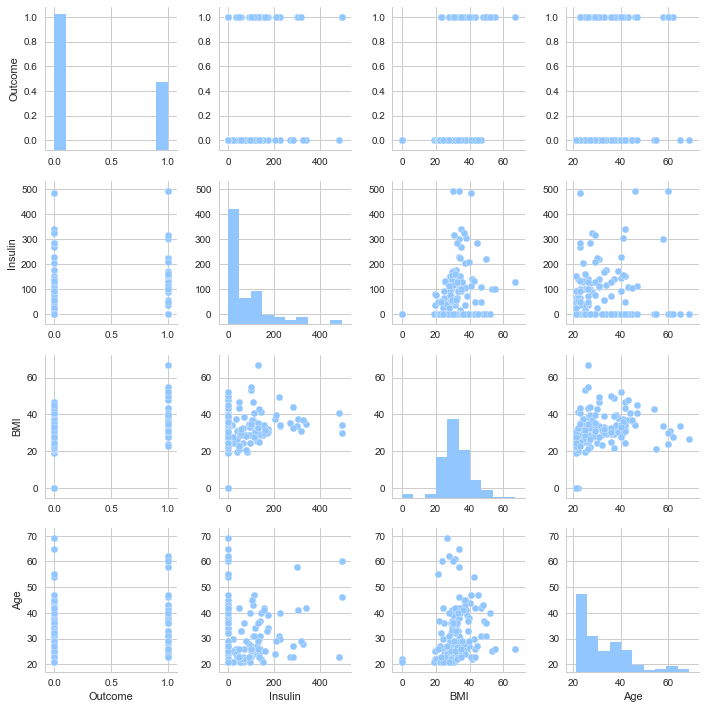

In [216]:
pairplot = sns.pairplot(diab[['Outcome', "Insulin", "BMI", "Age"]][50:200])

In [217]:
pairplot.savefig('pairplot.png')

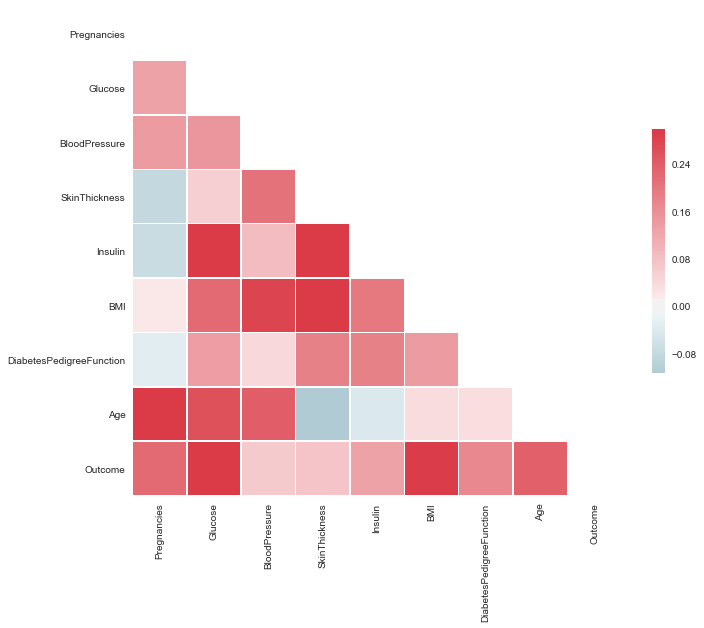

In [226]:
sns.set(style="white")
# Compute the correlation matrix
corr = diab.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns_plot = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [229]:
f.savefig('img/corrheat.png')

In [235]:
def violin_plot_binary(categorical_var, continuous_var, df):
    # Draw a nested violinplot and split the violins for easier comparison
    image = sns.violinplot(x=categorical_var, y=continuous_var, data=df, split=True,
                   inner="quart")
    sns.despine(left=True)
    return image

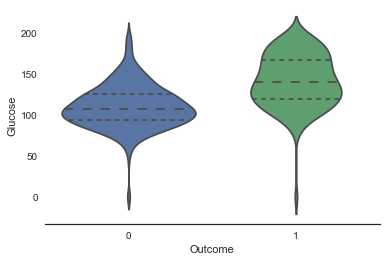

In [236]:
glucimg = violin_plot_binary("Outcome", "Glucose", diab)

In [238]:
glucimg.figure.savefig('img/gluc.png')

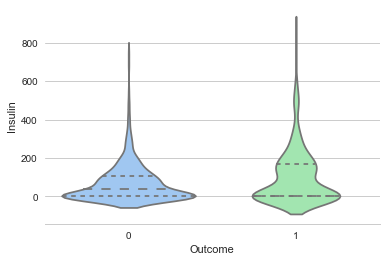

In [15]:
violin_plot_binary("Outcome", "Insulin", diab)

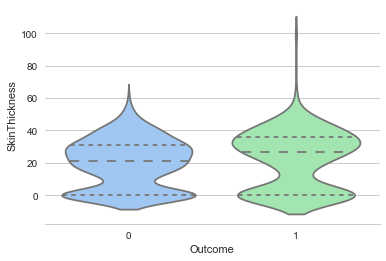

In [16]:
violin_plot_binary("Outcome", "SkinThickness", diab)

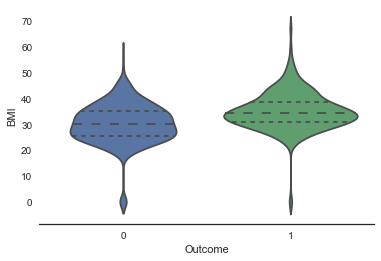

In [239]:
bmiimg = violin_plot_binary("Outcome", "BMI", diab)

In [240]:
bmiimg.figure.savefig('img/bmi.png')

In [18]:
## Things to Try
## Model 1 - Logistic Regression [['BMI', 'Glucose']]
## Model 2 - Logistic with all vars
## Model 3 - Logistic with Lasso
## Decision Tree

In [142]:
X = diab.drop('Outcome', axis=1)

In [143]:
y = diab['Outcome']

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, stratify=y)

In [26]:
mod_1 = LogisticRegression()

In [29]:
mod_1.fit(X_train[['BMI', 'Glucose']], y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
mod_1.coef_

array([[ 0.03990101,  0.02646296]])

In [44]:
y_test_preds = mod_1.predict_proba(X_test[['BMI', 'Glucose']])[:,1]

In [46]:
FPR_1, TPR_1, thresholds_1 = roc_curve(y_test, y_test_preds)

In [243]:
def plotroc(FPR, TPR):
    roc_auc = auc(FPR, TPR)
    plt.figure()
    lw = 2
    plt.plot(FPR, TPR, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('img/ROC.png')

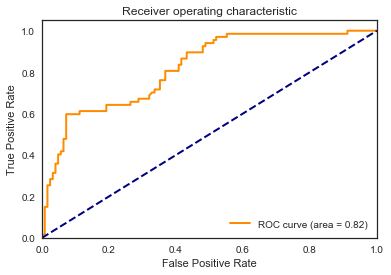

In [242]:
plotroc(FPR_1, TPR_1)

In [52]:
mod_2 = LogisticRegression()

In [53]:
mod_2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [55]:
y_test_preds2 = mod_2.predict_proba(X_test)[:,1]

In [56]:
FPR_2, TPR_2, thresholds_2 = roc_curve(y_test, y_test_preds2)

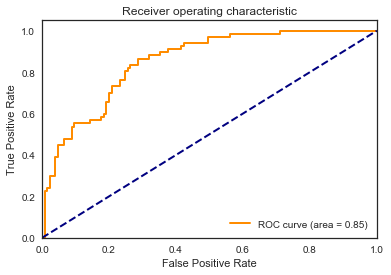

In [244]:
plotroc(FPR_2, TPR_2)

In [271]:
mod_3 = LogisticRegression(penalty='l1', C=0.4)

In [272]:
mod_3.fit(X_train, y_train)

LogisticRegression(C=0.4, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [273]:
y_test_preds3 = mod_3.predict_proba(X_test)[:,1]

In [274]:
FPR_3, TPR_3, thresholds_3 = roc_curve(y_test, y_test_preds3)

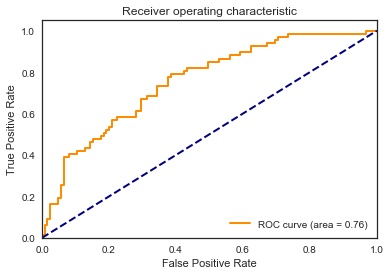

In [275]:
plotroc(FPR_3, TPR_3)

In [70]:
def try_lasso_hyperparam(X_train, y_train, X_test, y_test, params_to_try,):
    aucs = []
    for param in params_to_try:
        mod = LogisticRegression(penalty='l1', C=param)
        mod.fit(X_train, y_train)
        y_test_preds = mod.predict_proba(X_test)[:,1]
        aucs.append(roc_auc_score(y_test, y_test_preds))
    return aucs

In [81]:
params = np.linspace(.01,1,100)

In [82]:
params

array([ 0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,  0.09,
        0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,  0.16,  0.17,  0.18,
        0.19,  0.2 ,  0.21,  0.22,  0.23,  0.24,  0.25,  0.26,  0.27,
        0.28,  0.29,  0.3 ,  0.31,  0.32,  0.33,  0.34,  0.35,  0.36,
        0.37,  0.38,  0.39,  0.4 ,  0.41,  0.42,  0.43,  0.44,  0.45,
        0.46,  0.47,  0.48,  0.49,  0.5 ,  0.51,  0.52,  0.53,  0.54,
        0.55,  0.56,  0.57,  0.58,  0.59,  0.6 ,  0.61,  0.62,  0.63,
        0.64,  0.65,  0.66,  0.67,  0.68,  0.69,  0.7 ,  0.71,  0.72,
        0.73,  0.74,  0.75,  0.76,  0.77,  0.78,  0.79,  0.8 ,  0.81,
        0.82,  0.83,  0.84,  0.85,  0.86,  0.87,  0.88,  0.89,  0.9 ,
        0.91,  0.92,  0.93,  0.94,  0.95,  0.96,  0.97,  0.98,  0.99,  1.  ])

In [83]:
aucs = try_lasso_hyperparam(X_train, y_train, X_test, y_test, params)

Text(0.5,0,'Tuning Parameter "C"')

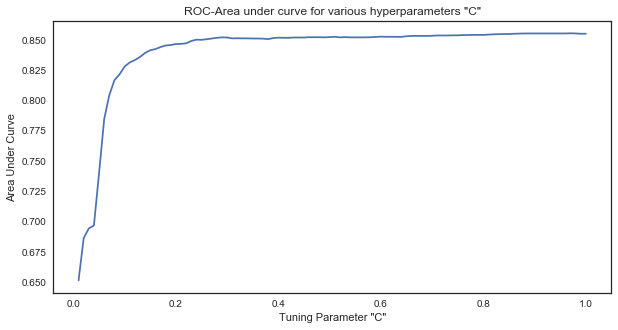

In [253]:
figpt = plt.figure(figsize=(10,5))
ax1 = figpt.add_subplot(111)
ax1.plot(params, aucs)
ax1.set_title('ROC-Area under curve for various hyperparameters "C"')
ax1.set_ylabel('Area Under Curve')
ax1.set_xlabel('Tuning Parameter "C"')

In [254]:
figpt.savefig('img/hyperparams.png')

In [208]:
def bootstrap_ci_coefficients(X_train, y_train, num_bootstraps):
    X_train = X_train.values
    y_train = y_train.values
    bootstrap_estimates = []
    for i in np.arange(num_bootstraps):
        sample_index = np.random.choice(range(0, len(y_train)), len(y_train))
        X_samples = X_train[sample_index]
        y_samples = y_train[sample_index]
        lm = LogisticRegression()
        lm.fit(X_samples, y_samples)
        bootstrap_estimates.append(lm.coef_[0])
    bootstrap_estimates = np.asarray(bootstrap_estimates)
    return bootstrap_estimates

In [209]:
bootstrapped_coefficients = bootstrap_ci_coefficients(X_train, y_train, 1000)

In [269]:
mod_3.coef_[0]

array([ 0.07567076,  0.01348636, -0.02646819,  0.        ,  0.00072267,
        0.00224477,  0.        , -0.00280659])

In [270]:
X_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

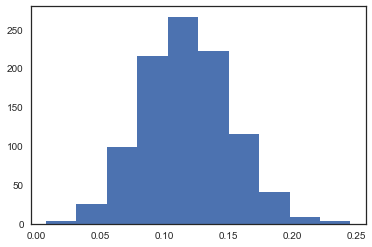

In [277]:
plt.hist(bootstrapped_coefficients[:,0]);

In [210]:
X_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [266]:
def plot_bootstrap_estimate(col_name_list, bootstrap_coefficient_array):
    number_of_graphs = len(col_name_list)
    fig, axes = plt.subplots(int((len(col_name_list)+1)/3),3, figsize=(10,10))
    count = 0
    for m, ax in zip(col_name_list, axes.flatten()):
        ax.hist(bootstrap_coefficient_array[:,count], bins=30)
        ax.set_title(m)
        count += 1
    return fig

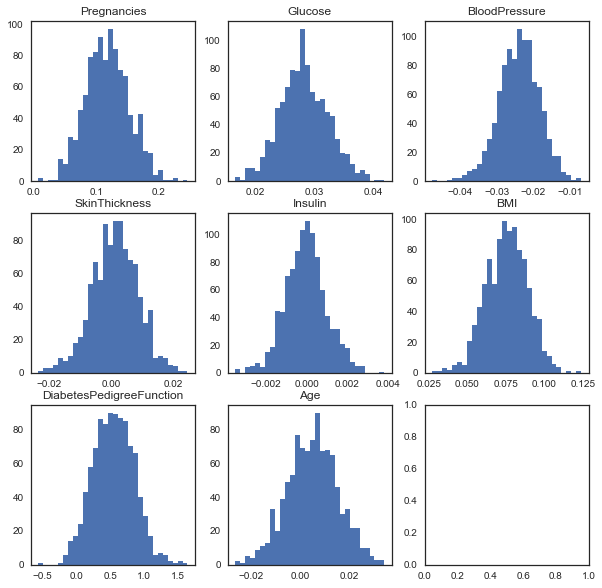

In [267]:
bscoefs = plot_bootstrap_estimate(X_train.columns, bootstrapped_coefficients)

In [268]:
bscoefs.savefig('img/bootstraps.png')